# E-commerce User Behavior Analysis

This project explores user interaction data from a multi-category e-commerce store to understand browsing, carting, and purchasing behavior.

### Objectives
- Analyze customer flow: view → cart → purchase
- Identify popular categories and peak activity times
- Clean and structure data for reliable insights
- Visualize user behavior with meaningful charts

### Dataset
- *Source:* Kaggle (9.1 GB, sample of 5_000_000 rows used)
- *Key Columns:* event_time, event_type, category_code, brand, price

### Tools
- pandas, seaborn, matplotlib
- Jupyter Notebook for analysis

In [1]:
#importing necessary libraries and loading the dataset


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Read only the required columns and limit rows to avoid MemoryError
df = pd.read_csv('2019-Nov.csv', nrows=5_000_000)
# Downcast int64 columns to int8 and float64 columns to float32 
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='integer')
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='float')
df.to_parquet('2019-Nov.parquet')

In [2]:
# I am using the parquet file for further analysis to save memory and speed up processing

df = pd.read_parquet('2019-Nov.parquet')



In [3]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.070007,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.649994,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,None,creed,28.309999,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.869995,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.270004,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [4]:
# Display the shape of the DataFrame to confirm successful loading
df.shape

(5000000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int32  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float32
 7   user_id        int32  
 8   user_session   object 
dtypes: float32(1), int32(2), int64(1), object(5)
memory usage: 286.1+ MB


#Cleaning the data

In [6]:
# Checking for missing values in the dataset
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    1602394
brand             727867
price                  0
user_id                0
user_session           0
dtype: int64

In [7]:
# Calculating the percentage of missing values in the 'category_code'and 'brand' column
df['category_code'].isnull().mean()*100 

np.float64(32.04788)

In [8]:
# Calculating the percentage of missing values in the 'brand' column
df['brand'].isnull().mean() * 100

np.float64(14.55734)

In [9]:
for col in ['category_code', 'brand']:
    null_ratio = df[col].isna().mean() * 100
    if null_ratio < 10:
        df[col] = df[col].fillna("unknown")
    else:
        df.dropna(subset=[col], inplace=True)


In [10]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.070007,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.649994,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.869995,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.270004,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
5,2019-11-01 00:00:01 UTC,view,1306894,2053013558920217191,computers.notebook,hp,360.089996,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
...,...,...,...,...,...,...,...,...,...
4999993,2019-11-04 07:09:03 UTC,view,1005115,2053013555631882655,electronics.smartphone,apple,921.979980,557459646,f0803979-fca4-41a6-b873-e6aba41ff3b9
4999994,2019-11-04 07:09:03 UTC,view,1801739,2053013554415534427,electronics.video.tv,samsung,274.399994,552643362,d2ac2a41-eb3d-477e-bba2-17120ebe9e5f
4999995,2019-11-04 07:09:03 UTC,view,2701880,2053013563911439225,appliances.kitchen.refrigerators,beko,275.700012,516323698,325aec08-0de6-47fa-83ed-a1bfc6deaade
4999997,2019-11-04 07:09:03 UTC,view,3601290,2053013563810775923,appliances.kitchen.washer,indesit,211.050003,522621981,4b01e5e9-5ae2-4cf9-be33-49a09cd1ddc0


In [11]:
# Checking the number of missing values in the 'brand' and 'category_code' column after filling or dropping
df["brand"].isnull().sum()

np.int64(0)

In [12]:
df["category_code"].isnull().sum()

np.int64(0)

In [13]:
df.isnull().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

In [14]:
df.shape

(3397606, 9)

#Converting the event_time to Datetime data


In [15]:
df["event_time"]=pd.to_datetime(df["event_time"], format="%Y-%m-%d %H:%M:%S UTC", errors='coerce')

In [16]:
# Extracting hour from the 'event_time' column(0-23)
df['hour'] = df['event_time'].dt.hour
# Extracting day from the 'event_time' column(1-31)
df['day'] = df['event_time'].dt.day
# Extracting day of week from the 'event_time' column(Monday-Sunday)
df['day_of_week'] = df['event_time'].dt.day_name()

def times_of_day(hour):
    if 5<=hour <=12:
        return 'morning'
    elif 12<= hour <=16:
        return 'afternoon'
    elif 16<= hour <=19:
        return 'evening'
    else:
        return 'night'
# Applying the function to create a new column 'time_of_day'
df['time_of_day'] = df['hour'].apply(times_of_day)

In [17]:
# Displaying the first few rows of the DataFrame to verify the new columns
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour,day,day_of_week,time_of_day
0,2019-11-01 00:00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.070007,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,0,1,Friday,night
1,2019-11-01 00:00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.649994,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,0,1,Friday,night
3,2019-11-01 00:00:01,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.869995,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,0,1,Friday,night
4,2019-11-01 00:00:01,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.270004,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,0,1,Friday,night
5,2019-11-01 00:00:01,view,1306894,2053013558920217191,computers.notebook,hp,360.089996,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c,0,1,Friday,night


#Top product category

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9320\3826131209.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purchase_counts.values, y=purchase_counts.index, palette='viridis')


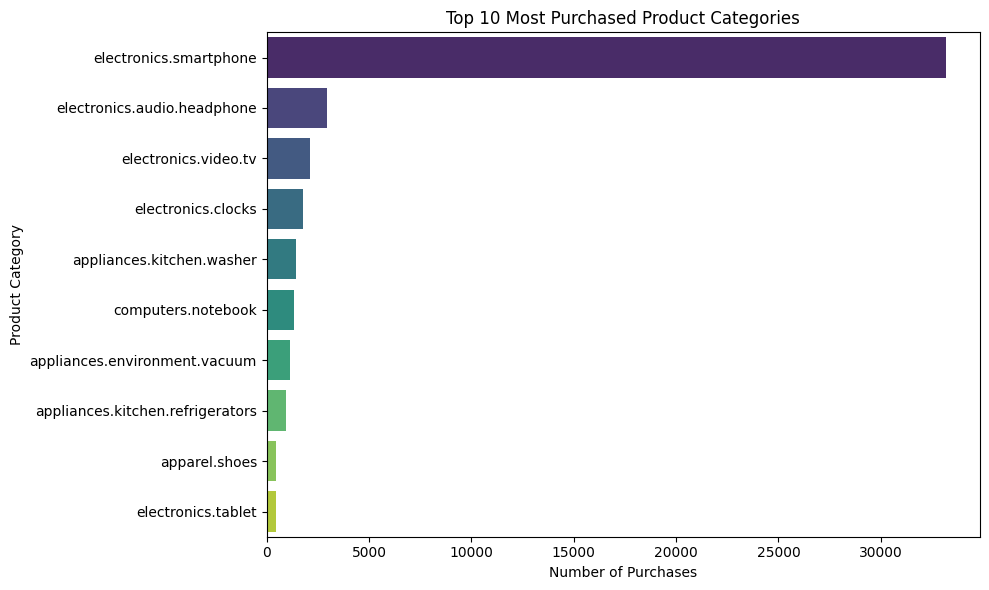

In [18]:
# Filter for purchase events and count occurrences by category_code
purchase_counts = df[df['event_type'] == 'purchase']['category_code'].value_counts().head(10)

# Plot the top purchased product categories
plt.figure(figsize=(10,6))
sns.barplot(x=purchase_counts.values, y=purchase_counts.index, palette='viridis')
plt.xlabel('Number of Purchases')
plt.ylabel('Product Category')
plt.title('Top 10 Most Purchased Product Categories')
plt.tight_layout()
plt.show()

###Lets see which brand has the most selling smartphone 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9320\4004140150.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='mako')


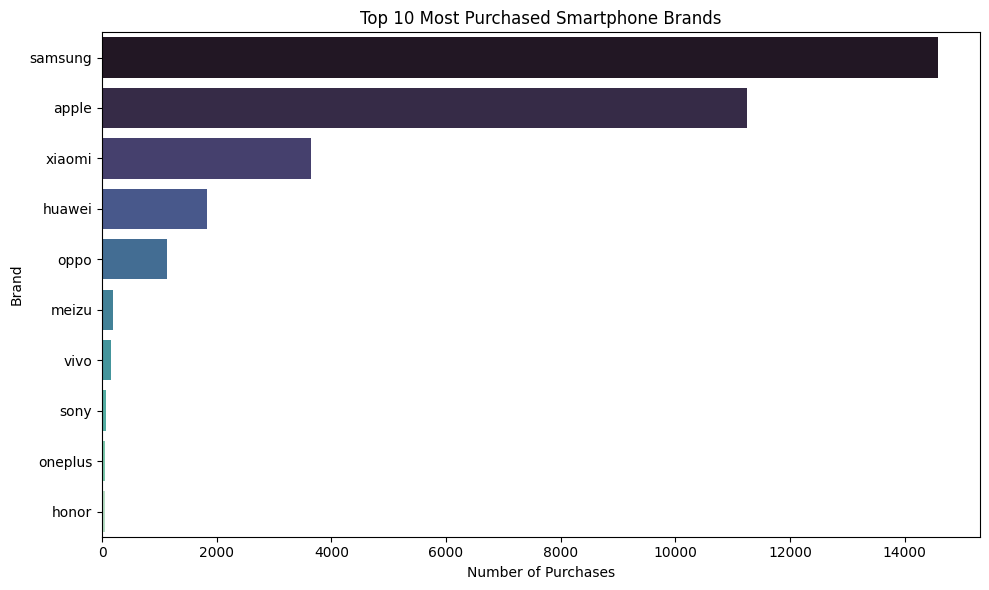

In [19]:
# Filter for purchases in the 'electronics.smartphone' category
smartphone_purchases = df[(df['event_type'] == 'purchase') & (df['category_code'] == 'electronics.smartphone')]

# Count purchases by brand
brand_counts = smartphone_purchases['brand'].value_counts().head(10)

# Plot the top purchased smartphone brands
plt.figure(figsize=(10,6))
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='mako')
plt.xlabel('Number of Purchases')
plt.ylabel('Brand')
plt.title('Top 10 Most Purchased Smartphone Brands')
plt.tight_layout()
plt.show()

#Lets see at which time customers buys most product


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9320\250231619.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette='crest')


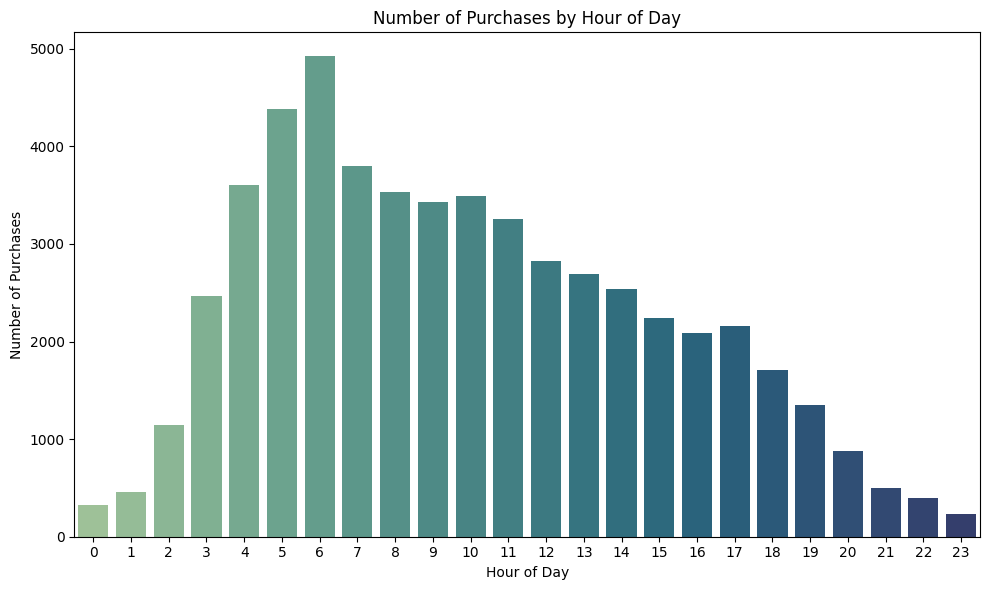

In [20]:
# Group by 'hour' and count the number of purchase events
hourly_sales = df[df['event_type'] == 'purchase']['hour'].value_counts().sort_index()

# Plot sales by hour
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette='crest')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by Hour of Day')
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9320\287847805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_view.index, y=hourly_view.values, palette='crest')


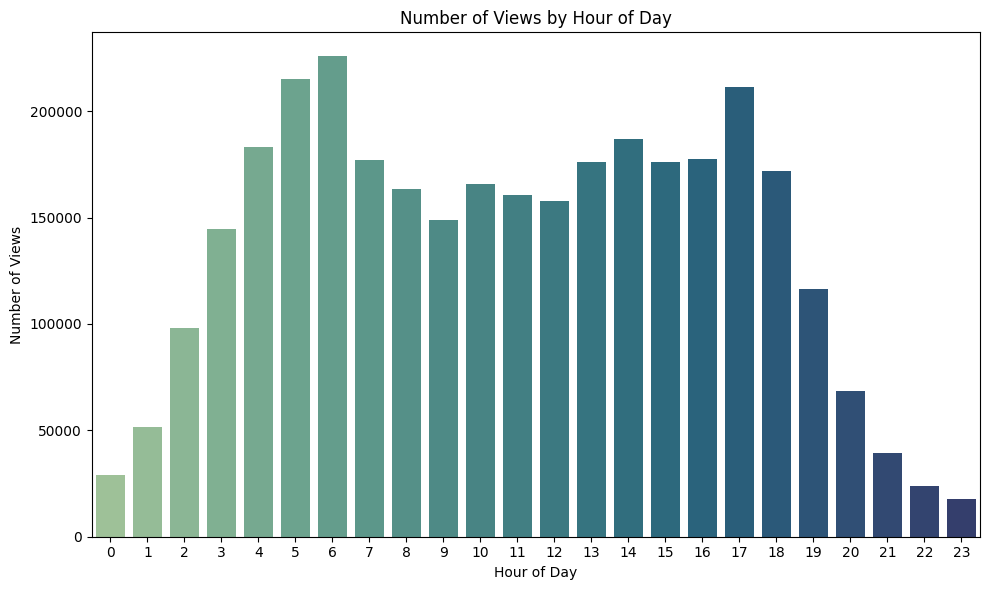

In [21]:
hourly_view= df[df['event_type'] == 'view']['hour'].value_counts().sort_index()
# Plot views by hour
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_view.index, y=hourly_view.values, palette='crest')
plt.xlabel('Hour of Day')       
plt.ylabel('Number of Views')
plt.title('Number of Views by Hour of Day')
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9320\3395226965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_added_cart.values, y=item_added_cart.index, palette='crest')


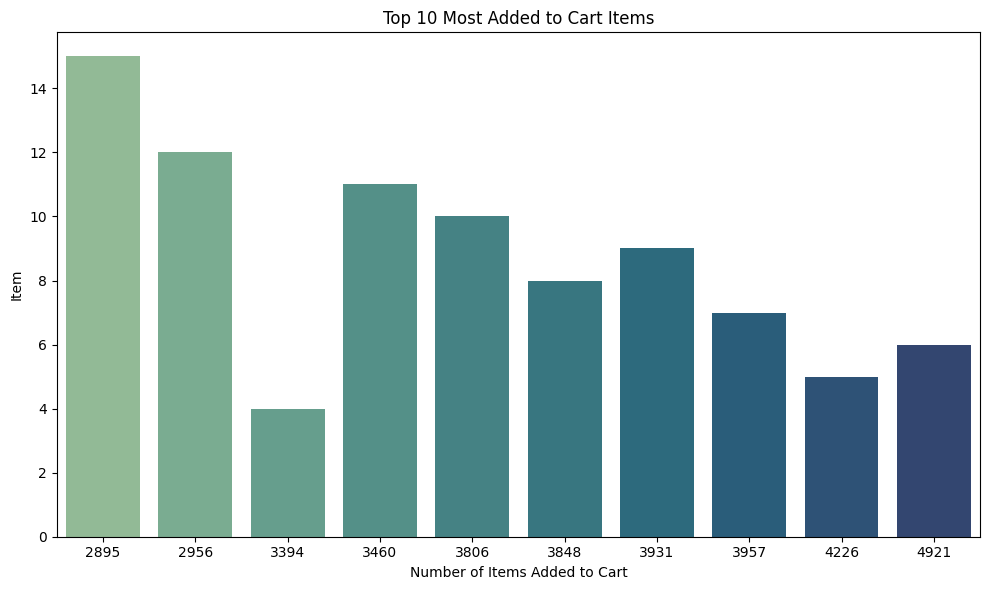

In [22]:
item_added_cart=df[df['event_type'] == 'cart']['hour'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=item_added_cart.values, y=item_added_cart.index, palette='crest')
plt.xlabel('Number of Items Added to Cart')
plt.ylabel('Item')
plt.title('Top 10 Most Added to Cart Items')
plt.tight_layout()
plt.show()




###Finding out each customer RFM values

In [23]:
df.tail()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour,day,day_of_week,time_of_day
4999993,2019-11-04 07:09:03,view,1005115,2053013555631882655,electronics.smartphone,apple,921.979980,557459646,f0803979-fca4-41a6-b873-e6aba41ff3b9,7,4,Monday,morning
4999994,2019-11-04 07:09:03,view,1801739,2053013554415534427,electronics.video.tv,samsung,274.399994,552643362,d2ac2a41-eb3d-477e-bba2-17120ebe9e5f,7,4,Monday,morning
4999995,2019-11-04 07:09:03,view,2701880,2053013563911439225,appliances.kitchen.refrigerators,beko,275.700012,516323698,325aec08-0de6-47fa-83ed-a1bfc6deaade,7,4,Monday,morning
4999997,2019-11-04 07:09:03,view,3601290,2053013563810775923,appliances.kitchen.washer,indesit,211.050003,522621981,4b01e5e9-5ae2-4cf9-be33-49a09cd1ddc0,7,4,Monday,morning
4999998,2019-11-04 07:09:03,view,5000691,2053013566100866035,appliances.sewing_machine,chayka,92.309998,514672200,dad7c1ca-8722-4aca-b6c7-b9e1b57307fb,7,4,Monday,morning


In [24]:
#lets calculate the recency
# Recency: days since last purchase for each user
latest_date = df['event_time'].max()
recency = df[df['event_type'] == 'purchase'].groupby('user_id')['event_time'].max()
recency = (latest_date - recency).dt.days
recency.head()

user_id
356520186    3
428293417    1
447698613    1
460752410    0
467047496    0
Name: event_time, dtype: int64

In [29]:
#Now lets calculate the frequency
# Frequency: number of purchases in the last 30 days for each user
frequency = df.drop_duplicates(subset=['user_id', 'event_time']).groupby('user_id').size()
frequency = frequency[frequency.index.isin(recency.index)]  # Ensure frequency matches recency    
frequency.head()

user_id
356520186    10
428293417     5
447698613     3
460752410     6
467047496     5
dtype: int64

In [30]:
#monetary value: total amount spent by each user in the last 30 days
monetary = df[df['event_type'] == 'purchase'].groupby('user_id')['price'].sum()
monetary = monetary[monetary.index.isin(recency.index)]  # Ensure monetary matches recency
monetary.head()

user_id
356520186      33.450001
428293417    1575.500000
447698613     282.859985
460752410     921.979980
467047496     396.149994
Name: price, dtype: float32

In [31]:
# Createing a medal system based on monetary value

rfm = pd.DataFrame({'monetary': monetary})

def assign_medal(amount):
    if amount > 5000:
        return 'gold'
    elif amount > 1000:
        return 'silver'
    elif amount > 500:
        return 'bronze'
    else:
        return 'no medal'

rfm['medal'] = rfm['monetary'].apply(assign_medal)
rfm.head()

,monetary,medal
user_id,,
356520186,33.450001,no medal
428293417,1575.500000,silver
447698613,282.859985,no medal
460752410,921.979980,bronze
467047496,396.149994,no medal



##  Conclusion

This analysis of 5 million rows of e-commerce data provided valuable insights into customer behavior. Here's what we learned:

-  **Smartphones and electronics** are among the most purchased items.
-  **Purchases peak during the evening and late afternoon**, indicating high engagement post-work hours.
-  **Cart additions** are most frequent around mid-day, hinting at lunchtime browsing behavior.
-  **RFM analysis** allowed segmentation of users by value, revealing that only a few high-value users qualify for a 'gold' or 'silver' tier.

